## 기여율 계산 공식 변경

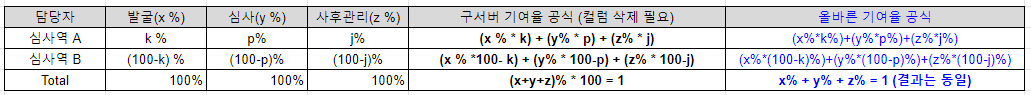

## 심사역 1명일 때의 기여율 계산 변수 셋팅

In [15]:
x = 0.4
y = 0.2
z = 0.4

In [23]:
prcs_vec = [x,y,z]

In [24]:
# 심사역 1명이라면 개별 프로세스 내에서의 기여도 비율은 모두 100%
k = 1
p = 1
j =  1

In [25]:
in_prcs_vec = [k, p, j]

### 심사역 1명일 때의 기여율 계산 함수 (벡터 내적)

In [28]:
def calc_ctbr_ratio(prcs_vec, in_prcs_vec):
    result = 0
    
    for x,y in zip(prcs_vec, in_prcs_vec):
        result += x*y

    return result

In [30]:
ratio = calc_ctbr_ratio(prcs_vec, in_prcs_vec)
ratio

1.0

----

## 심사역 N명일 때의 기여율 계산 (일반화)

In [84]:
n = int(input("심사역 수를 입력하세요"))
print(f"기여율 계산 대상 심사역 수는 {n}명입니다.")

심사역 수를 입력하세요 5


기여율 계산 대상 심사역 수는 5명입니다.


In [24]:
x = float(input("발굴 프로세스 비중을 소숫점 둘째자리 까지 입력하세요"))
y = float(input("심사 프로세스 비중을 소숫점 둘째자리 까지 입력하세요"))
z = float(input("사후관리 프로세스 비중을 소숫점 둘째자리 까지 입력하세요"))

if x+y+z != 1:
    print(f"\n프로세스 별 비중의 총합이 {x+y+z}으로, 100%가 아닙니다. 다시 입력해주세요")

else:
    print(f"\n프로세스 별 비중의 총합이 {x+y+z}으로, 100%입니다. 프로세스 내 심사역별 기여율을 계산하세요")

발굴 프로세스 비중을 소숫점 둘째자리 까지 입력하세요 0.3
심사 프로세스 비중을 소숫점 둘째자리 까지 입력하세요 0.3
사후관리 프로세스 비중을 소숫점 둘째자리 까지 입력하세요 0.4



프로세스 별 비중의 총합이 1.0으로, 100%입니다. 프로세스 내 심사역별 기여율을 계산하세요


In [91]:
import pandas as pd
import numpy as np

ls = []

prcs_ratio_vec = np.array([x,y,z])

# n명의 심사역이 특정 프로세스 내(x or y or z)에서 모두 균등 기여 가정 
# 각 프로세스 내 균등 분포 기여율 벡터 생성
for i in range(0,n):
    ls.append(1/n)

ratio_in_prcs = pd.DataFrame(ls)

ratio_in_prcs_matrix = pd.concat([ratio_in_prcs, ratio_in_prcs, ratio_in_prcs], axis = 1)

players = pd.DataFrame(["A", "B", "C", "D", "E"])


In [113]:
player_ratio_matrix = pd.concat([players, ratio_in_prcs_matrix], axis=1)

In [136]:
player_ratio_matrix.columns = ["players", "r_dig", "r_scrn", "r_post"]

In [169]:
player_ratio_matrix

,players,r_dig,r_scrn,r_post
0,A,0.2,0.2,0.2
1,B,0.2,0.2,0.2
2,C,0.2,0.2,0.2
3,D,0.2,0.2,0.2
4,E,0.2,0.2,0.2


In [ ]:
# 프로세스별로 각 심사역 개인의 가중치 행렬이 나왔으므로, 사전 정의된 프로세스 벡터(1*3)를 곱해주자

In [170]:
prcs_ratio_vec

array([0.3, 0.3, 0.4])

In [179]:
# 각 심사역별 기여율 가중평균을 위한 벡터 내적

a_ratio = [x*y for x,y in zip(prcs_ratio_vec, player_ratio_matrix.iloc[0, 1:])]
b_ratio = [x*y for x,y in zip(prcs_ratio_vec, player_ratio_matrix.iloc[1, 1:])]
c_ratio = [x*y for x,y in zip(prcs_ratio_vec, player_ratio_matrix.iloc[2, 1:])]
d_ratio = [x*y for x,y in zip(prcs_ratio_vec, player_ratio_matrix.iloc[3, 1:])]
e_ratio = [x*y for x,y in zip(prcs_ratio_vec, player_ratio_matrix.iloc[4, 1:])]

In [187]:
a_ratio 
# 여기 0.08밑으로 안떨어지는 소숫점은 뭐여 ?

[0.06, 0.06, 0.08000000000000002]

In [185]:
final_a_ratio = sum(a_ratio)
final_b_ratio = sum(b_ratio)
final_c_ratio = sum(c_ratio)
final_d_ratio = sum(d_ratio)
final_e_ratio = sum(e_ratio)

사전에 수립한 공식에 의하면 위 모든 심사역별 최종 가중치 값은 1이 되어야 함

그거 확인

In [188]:
if (final_a_ratio)

1.0